In [1]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import skimage
from skimage.io import imread
import matplotlib.pyplot as plt
from create_record import (
    create_masks_dict, 
    get_bbox_coordinates, 
    convert_mask_rle_to_img_array
)

%load_ext autoreload
%autoreload 2

In [2]:
DATA_PATH = '/home/wentao/Development/data/ships_detection'
TRAIN_DIR = os.path.join(DATA_PATH, 'train')
TEST_DIR = os.path.join(DATA_PATH, 'test')
SAMPLE_CSV = os.path.join(DATA_PATH, 'sample_submission.csv')
MASKS_CSV = os.path.join(DATA_PATH, 'train_ship_segmentations.csv')

In [3]:
masks_df = pd.read_csv(MASKS_CSV)
masks_dict = create_masks_dict(MASKS_CSV)

In [4]:
def convert_masks_as_image(masks):
    all_masks = np.zeros((768, 768), dtype = np.int16)
    for mask in masks:
        mask_array = convert_mask_rle_to_img_array(mask)
        all_masks += mask_array
    
    return all_masks

In [5]:
image_ids = [key for key in masks_dict.keys()]

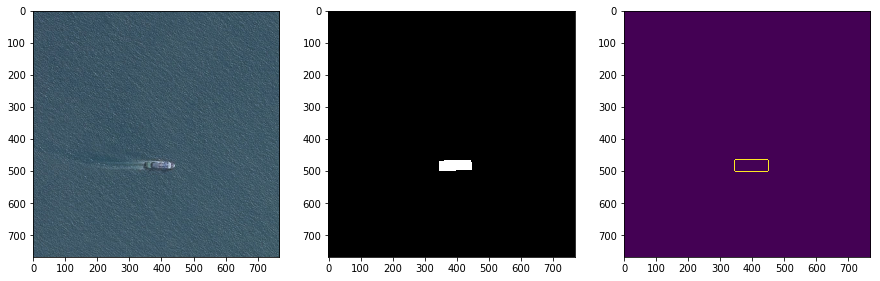

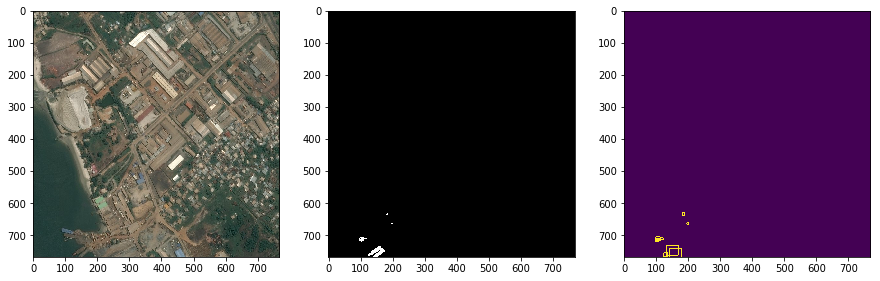

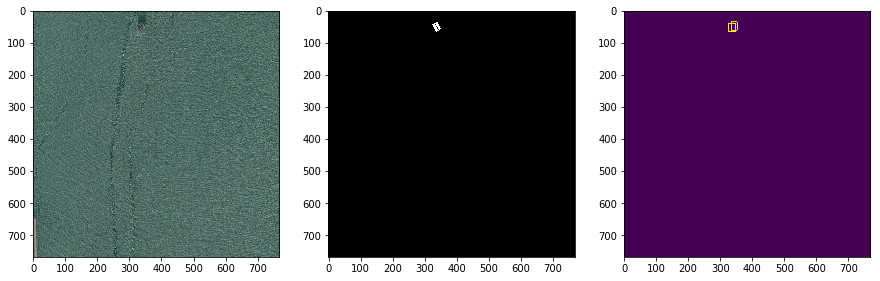

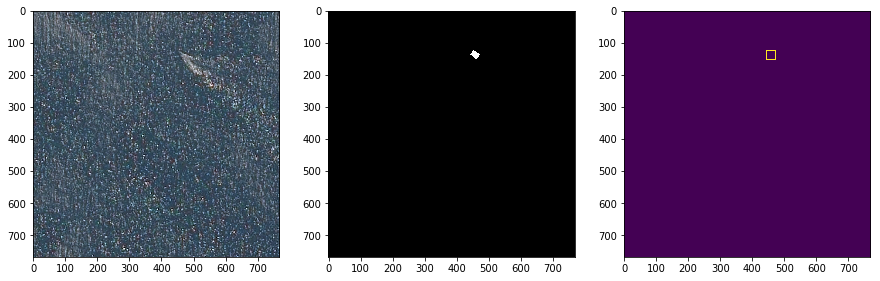

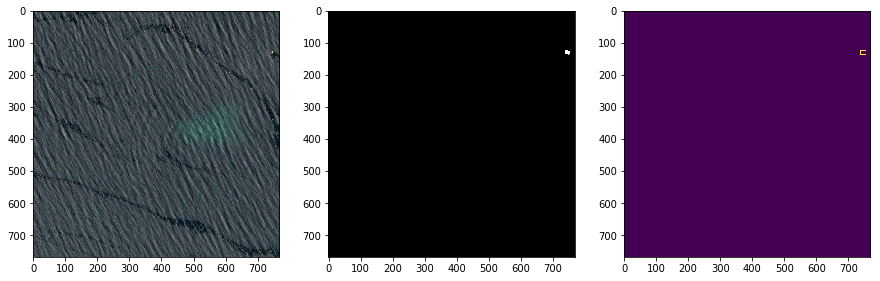

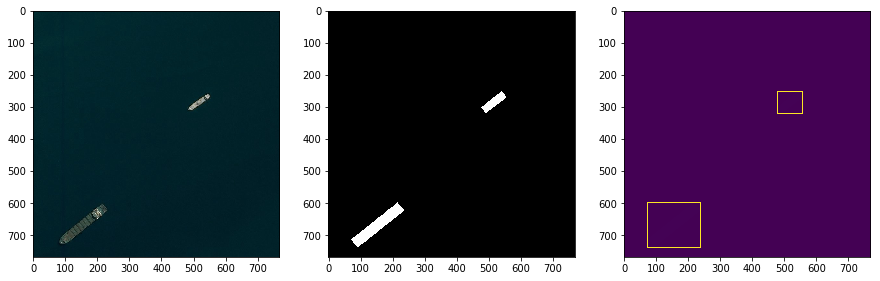

In [6]:
for index, (image_id, masks) in enumerate(masks_dict.items()):
    img_path = os.path.join(TRAIN_DIR, image_id)
    masks = masks_dict[image_id]


    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
    
    encoded_masks = convert_masks_as_image(masks)
    bboxes = encoded_masks.copy()
    for mask in masks:
        mask_array = convert_mask_rle_to_img_array(mask)
        xmin, xmax, ymin, ymax = get_bbox_coordinates(mask_array)
        cv2.rectangle(bboxes, (xmin, ymin), (xmax, ymax), (255, 0, 0), 2)
    
    ax1.imshow(imread(img_path))
    ax2.imshow(encoded_masks, cmap='gray')
    ax3.imshow(bboxes)
    plt.show()
    if index == 5:
        break

In [ ]:
ships_id = ships_df['ImageId'].unique()

In [ ]:
for i in range(2):
    image_id = ships_id[i]
    
    #fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 5))
    
    #img_0 = imread(os.path.join(TRAIN_DIR, image_id))
    rle_0 = ships_df[ships_df['ImageId'] == image_id]['EncodedPixels']
    print(len(rle_0))
#     mask_0 = convert_mask_rle_to_img_array(rle_0)
    
#     lbl_0 = label(mask_0)
#     props = regionprops(lbl_0)
    
#     img_1 = img_0.copy()
    
#     for prop in props:
#         print('Found bbox', prop.bbox)
#         cv2.rectangle(img_1, (prop.bbox[1], prop.bbox[0]), (prop.bbox[3], prop.bbox[2]), (255, 0, 0), 2)
    
#     ax1.set_title('Image')
#     ax2.set_title('Mask')
#     ax3.set_title('Image with derived bounding box')
    
#     ax1.imshow(img_0)
#     ax2.imshow(mask_0[...,0], cmap='gray')
#     ax3.imshow(img_1)
#     plt.show()

In [ ]:
plt.imshow(imread(os.path.join(TRAIN_DIR, ships_id[1])))

In [ ]:
rle_0 = ships_df[ships_df['ImageId'] == ships_id[1]]['EncodedPixels']

In [ ]:
for rle in rle_0:
    mask = convert_mask_rle_to_img_array(rle)

In [ ]:
mask_0.shape

In [ ]:
mask_0.shape

In [ ]:
np.max(mask_0)

In [ ]:
mask_0[...,0].shape

In [ ]:
skimage.io.imsave(os.path.join(MASK_DIR, 'test.png'), mask_0[..., 0])

In [ ]:
masks = []
masks.append(mask_0)
masks.append(mask_0)

In [ ]:
np.asarray(masks).shape

In [ ]:
mask_0[..., 0].shape

In [ ]:
img = PIL.Image.fromarray(mask_0[...,0])
output = io.BytesIO()
img.save(output, format='PNG')

In [ ]:
output.getvalue()